<a href="https://colab.research.google.com/github/kritisinghh/CNN/blob/main/Number_Plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless pytesseract requests
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,849 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

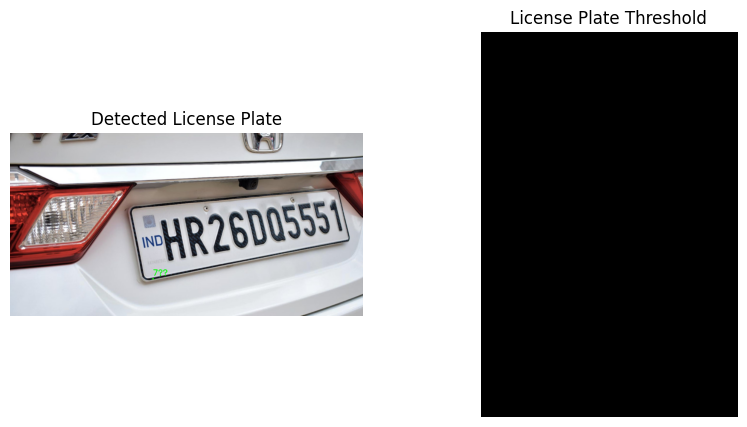

In [ ]:
#Code1
import cv2
import pytesseract
import requests
import numpy as np
from matplotlib import pyplot as plt

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    else:
        print(f"Error: Could not download image from {url}")
        return None

# URL of the image
image_url = 'https://assets.mspimages.in/gear/wp-content/uploads/2023/01/Number-plates-in-India.png'
image = download_image(image_url)

if image is not None:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to find license plate
    license_plate = None
    for contour in contours:
        # Approximate the contour
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)

        # We assume the license plate is a rectangle with 4 corners
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            license_plate = gray[y:y + h, x:x + w]

            # Use thresholding to preprocess the license plate for OCR
            _, license_plate_thresh = cv2.threshold(license_plate, 150, 255, cv2.THRESH_BINARY)

            # Use pytesseract to extract text from the license plate
            text = pytesseract.image_to_string(license_plate_thresh, config='--psm 8')

            # Draw a rectangle around the license plate and put the detected text
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            break

    # Display the original image and the license plate image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected License Plate')
    plt.axis('off')

    if license_plate is not None:
        plt.subplot(1, 2, 2)
        plt.imshow(license_plate_thresh, cmap='gray')
        plt.title('License Plate Threshold')
        plt.axis('off')

    plt.show()

else:
    print("Failed to process the image.")


Printing Number

In [ ]:
!pip install opencv-python-headless pytesseract requests
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


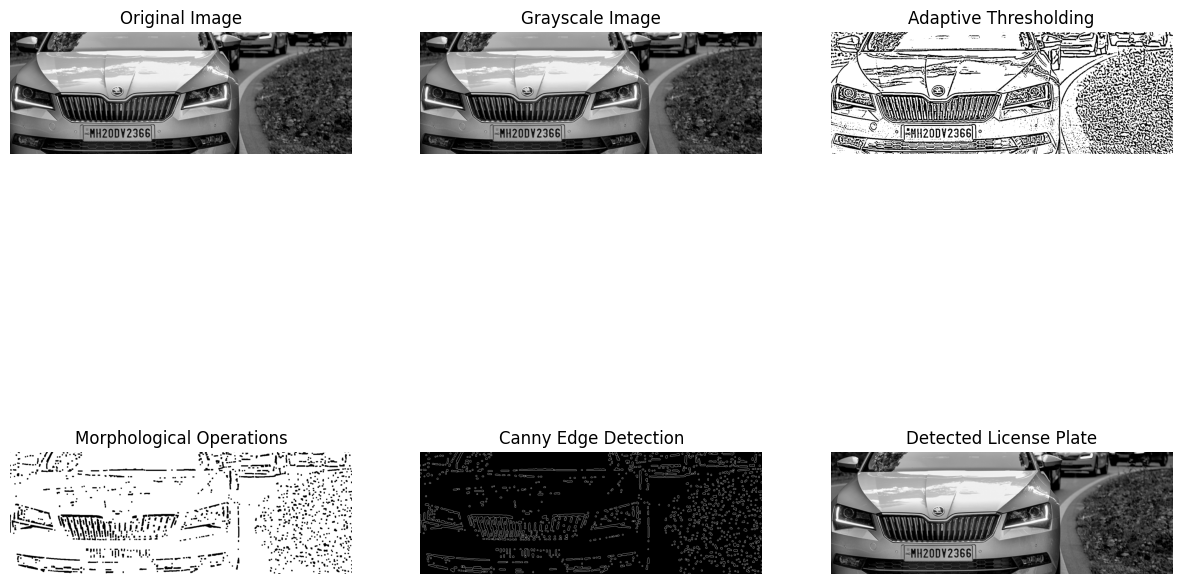

No license plate detected.


In [ ]:
import cv2
import pytesseract
import requests
import numpy as np
from matplotlib import pyplot as plt

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    else:
        print(f"Error: Could not download image from {url}")
        return None

# URL of the image
image_url = 'https://cdn.skoda-storyboard.com/2019/02/Skoda-Superb-BW-India.jpg'
image = download_image(image_url)

if image is not None:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use adaptive thresholding to handle varying lighting conditions
    adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Apply morphological operations to close gaps and remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    morph = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

    # Use Canny edge detection
    edges = cv2.Canny(morph, 100, 200)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to find license plate based on aspect ratio and area
    license_plate = None
    detected_text = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)

        # Criteria for license plate: Aspect ratio between 2 and 6, area above a certain threshold
        if 2 < aspect_ratio < 6 and area > 1000:
            license_plate = gray[y:y + h, x:x + w]

            # Use adaptive thresholding on the license plate region
            license_plate_thresh = cv2.adaptiveThreshold(license_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

            # Use pytesseract to extract text from the license plate
            detected_text = pytesseract.image_to_string(license_plate_thresh, config='--psm 8')

            # Draw a rectangle around the license plate and put the detected text
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, detected_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            break

    # Display the intermediate steps and final result
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(morph, cmap='gray')
    plt.title('Morphological Operations')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected License Plate')
    plt.axis('off')

    plt.show()

    if license_plate is not None:
        plt.figure(figsize=(10, 5))
        plt.imshow(license_plate_thresh, cmap='gray')
        plt.title('License Plate Threshold')
        plt.axis('off')
        plt.show()

    if detected_text:
        print("Detected License Plate Number:", detected_text.strip())
    else:
        print("No license plate detected.")
else:
    print("Failed to process the image.")
